# Ames Modeling Project

## Question to answer:
- Predicting the price of a house at sale in Ames, Iowa based on house features

In [1]:
#importing important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

In [2]:
#load in data set
train = pd.read_csv('./datasets/train.csv')

## Begin EDA

In [3]:
train.shape

(2051, 81)

In [4]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [5]:
train.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [6]:
train.columns = train.columns.str.replace(' ', '_')
#using code from our class ames lesson to get rid of spacing in column names 

In [7]:
train.columns = train.columns.str.lower() #decided to go ahead and lower names as well

In [8]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2051.0,1.474034e+03,8.439808e+02,1.0,753.5,1486.0,2.198000e+03,2930.0
pid,2051.0,7.135900e+08,1.886918e+08,526301100.0,528458140.0,535453200.0,9.071801e+08,924152030.0
ms_subclass,2051.0,5.700878e+01,4.282422e+01,20.0,20.0,50.0,7.000000e+01,190.0
lot_frontage,1721.0,6.905520e+01,2.326065e+01,21.0,58.0,68.0,8.000000e+01,313.0
lot_area,2051.0,1.006521e+04,6.742489e+03,1300.0,7500.0,9430.0,1.151350e+04,159000.0
overall_qual,2051.0,6.112140e+00,1.426271e+00,1.0,5.0,6.0,7.000000e+00,10.0
overall_cond,2051.0,5.562165e+00,1.104497e+00,1.0,5.0,5.0,6.000000e+00,9.0
year_built,2051.0,1.971709e+03,3.017789e+01,1872.0,1953.5,1974.0,2.001000e+03,2010.0
year_remod/add,2051.0,1.984190e+03,2.103625e+01,1950.0,1964.5,1993.0,2.004000e+03,2010.0
mas_vnr_area,2029.0,9.969591e+01,1.749631e+02,0.0,0.0,0.0,1.610000e+02,1600.0


In [9]:
train.isnull().sum()[train.isnull().sum() != 0]

lot_frontage       330
alley             1911
mas_vnr_type        22
mas_vnr_area        22
bsmt_qual           55
bsmt_cond           55
bsmt_exposure       58
bsmtfin_type_1      55
bsmtfin_sf_1         1
bsmtfin_type_2      56
bsmtfin_sf_2         1
bsmt_unf_sf          1
total_bsmt_sf        1
bsmt_full_bath       2
bsmt_half_bath       2
fireplace_qu      1000
garage_type        113
garage_yr_blt      114
garage_finish      114
garage_cars          1
garage_area          1
garage_qual        114
garage_cond        114
pool_qc           2042
fence             1651
misc_feature      1986
dtype: int64

## Data Cleaning

### Addressing ordinal missing values

- We know from the data descriptions that null values for basements, garages, masonry, and fireplaces means that there is no basement, garage, masonry, or fireplace. So going to fill those null values with 0's
- Going to be creating functions to to easily change any ordinal categorical data to numerical data based on specific ranking systems for values I believe to play a huge role in pricing that we can use on both training and testing data

In [10]:
train.isnull().sum()[train.isnull().sum() != 0]

lot_frontage       330
alley             1911
mas_vnr_type        22
mas_vnr_area        22
bsmt_qual           55
bsmt_cond           55
bsmt_exposure       58
bsmtfin_type_1      55
bsmtfin_sf_1         1
bsmtfin_type_2      56
bsmtfin_sf_2         1
bsmt_unf_sf          1
total_bsmt_sf        1
bsmt_full_bath       2
bsmt_half_bath       2
fireplace_qu      1000
garage_type        113
garage_yr_blt      114
garage_finish      114
garage_cars          1
garage_area          1
garage_qual        114
garage_cond        114
pool_qc           2042
fence             1651
misc_feature      1986
dtype: int64

In [11]:
cols = ['mas_vnr_type', 'mas_vnr_area', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 
        'fireplace_qu', 'garage_type', 'garage_qual', 'garage_cond', 'garage_finish', 
        'garage_yr_blt', 'garage_cars', 'garage_area', 'pool_qc', 'alley', 'fence', 'misc_feature'] 

for col in cols:
    train[col].fillna(0, inplace=True)

- Since the null amounts for garages are the same I decided to say they were no garage and lump the null cars and area group in as well since they were missing just 1 value each 


In [12]:
train.isnull().sum()[train.isnull().sum() != 0]

lot_frontage      330
bsmtfin_type_1     55
bsmtfin_sf_1        1
bsmtfin_type_2     56
bsmtfin_sf_2        1
bsmt_unf_sf         1
total_bsmt_sf       1
bsmt_full_bath      2
bsmt_half_bath      2
dtype: int64

In [13]:
train.dtypes[train.dtypes == object]

ms_zoning         object
street            object
alley             object
lot_shape         object
land_contour      object
utilities         object
lot_config        object
land_slope        object
neighborhood      object
condition_1       object
condition_2       object
bldg_type         object
house_style       object
roof_style        object
roof_matl         object
exterior_1st      object
exterior_2nd      object
mas_vnr_type      object
exter_qual        object
exter_cond        object
foundation        object
bsmt_qual         object
bsmt_cond         object
bsmt_exposure     object
bsmtfin_type_1    object
bsmtfin_type_2    object
heating           object
heating_qc        object
central_air       object
electrical        object
kitchen_qual      object
functional        object
fireplace_qu      object
garage_type       object
garage_finish     object
garage_qual       object
garage_cond       object
paved_drive       object
pool_qc           object
fence             object


In [14]:
train['bsmt_cond'].value_counts()

TA    1834
Gd      89
Fa      65
0       55
Po       5
Ex       3
Name: bsmt_cond, dtype: int64

In [15]:
#creating a function to switch our categorical data to numerical data for quality/condition
def qual_to_num(string):
    if string == 'Ex':
        return 5
    elif string == 'Gd':
        return 4
    elif string == 'TA':
        return 3
    elif string == 'Fa':
        return 2
    elif string == 'Po':
        return 1
    else:
        return 0

In [16]:
train['bsmtfin_type_1'].value_counts()

GLQ    615
Unf    603
ALQ    293
BLQ    200
Rec    183
LwQ    102
Name: bsmtfin_type_1, dtype: int64

In [17]:
#function to change bsmt finish since we have two columns for that
def num_finish(string):
    if string == 'GLQ':
        return 6
    elif string == 'ALQ':
        return 5
    elif string == 'BLQ':
        return 4
    elif string == 'Rec':
        return 3
    elif string == 'LwQ':
        return 2
    elif string == 'Unf':
        return 1
    else:
        return 0

In [18]:
train['electrical'].value_counts()

SBrkr    1868
FuseA     140
FuseF      35
FuseP       7
Mix         1
Name: electrical, dtype: int64

In [19]:
#function for changing electrical categories to numerical values
def elec_type(string):
    if string == 'SBrKr':
        return 5
    elif string == 'FuseA':
        return 4
    elif string == 'FuseF':
        return 3
    elif string == 'FuseP':
        return 2
    elif string == 'Mix':
        return 1
    else:
        return 0
        

In [20]:
train['functional'].value_counts()

Typ     1915
Min1      42
Min2      42
Mod       29
Maj1      12
Maj2       7
Sev        2
Sal        2
Name: functional, dtype: int64

In [21]:
#function for numerically ranking house functionality
def house_func(string):
    if string == 'Typ':
        return 7
    elif string == 'Min2':
        return 6
    elif string == 'Min1':
        return 5
    elif string == 'Mod':
        return 4
    elif string == 'Maj1':
        return 3
    elif string == 'Maj2':
        return 2
    elif string == 'Sev':
        return 1
    else:
        return 0

In [22]:
train['utilities'].value_counts()

AllPub    2049
NoSewr       1
NoSeWa       1
Name: utilities, dtype: int64

In [23]:
#creating function for utilities values
def utilities_type(string):
    if string == 'AllPub':
        return 4
    elif string == 'NoSewr':
        return 3
    elif string == 'NoSeWa':
        return 2
    elif string == 'ELO':
        return 1
    else:
        return 0

In [24]:
train['bsmt_exposure'].value_counts()

No    1339
Av     288
Gd     203
Mn     163
0       58
Name: bsmt_exposure, dtype: int64

In [25]:
def base_expose(string):
    if string == 'Gd':
        return 4
    elif string == 'Av':
        return 3
    elif string == 'Mn':
        return 2
    elif string == 'No':
        return 1
    else:
        return 0

In [26]:
train['garage_finish'].value_counts()

Unf    849
RFn    579
Fin    509
0      114
Name: garage_finish, dtype: int64

In [27]:
def garage_fin_num(string):
    if string == 'Fin':
        return 3
    elif string == 'RFn':
        return 2
    elif string == 'Unf':
        return 1
    else:
        return 0

In [28]:
train['paved_drive'].value_counts()

Y    1861
N     151
P      39
Name: paved_drive, dtype: int64

In [29]:
def paved_drive(string):
    if string == 'Y':
        return 2
    elif string == 'P':
        return 1
    else:
        return 0

In [30]:
train['lot_shape'].value_counts()

Reg    1295
IR1     692
IR2      55
IR3       9
Name: lot_shape, dtype: int64

In [31]:
def lot_shape(string):
    if string == 'Reg':
        return 4
    elif string == 'IR1':
        return 3
    elif string == 'IR2':
        return 2
    elif string == 'IR3':
        return 1
    else:
        return 0

In [32]:
train['land_slope'].value_counts()

Gtl    1953
Mod      88
Sev      10
Name: land_slope, dtype: int64

In [33]:
def slope_type(string):
    if string == 'Gtl':
        return 3
    elif string == 'Mod':
        return 2
    elif string == 'Sev':
        return 1
    else:
        return 0

In [109]:
train['fence'].value_counts()

0        1651
MnPrv     227
GdPrv      83
GdWo       80
MnWw       10
Name: fence, dtype: int64

In [110]:
def fence_num(string):
    if string == 'GdPrv':
        return 4
    elif string == 'MnPrv':
        return 3
    elif string == 'GdWo':
        return 2
    elif string == 'MnWw':
        return 1
    else:
        return 0

### Converting ordinal data with the fucntions from above 

In [34]:
train.columns

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt',
       'g

In [35]:
#iterating through each quality/condition column in order to call the function to switch each value to it's corresponding number
for col in ['exter_qual', 'exter_cond', 'bsmt_qual', 'bsmt_cond', 'kitchen_qual', 
            'fireplace_qu', 'garage_qual', 'garage_cond', 'heating_qc', 'pool_qc']:
    train[col] = train[col].map(qual_to_num)

In [36]:
train['exter_cond'].value_counts() #checking to see if function worked

3    1778
4     215
2      49
5       7
1       2
Name: exter_cond, dtype: int64

In [37]:
#iterating through each basement finish type to call function to switch values
for col in ['bsmtfin_type_1', 'bsmtfin_type_2']:
    train[col] = train[col].map(num_finish)

In [38]:
train['bsmtfin_type_1'].value_counts() #checking to see if function worked

6    615
1    603
5    293
4    200
3    183
2    102
0     55
Name: bsmtfin_type_1, dtype: int64

In [39]:
#calling function to switch electrical values to the new numerical values
train['electrical'] = train['electrical'].map(elec_type) 

In [40]:
train['electrical'].value_counts() #checking to see if function worked

0    1868
4     140
3      35
2       7
1       1
Name: electrical, dtype: int64

In [41]:
#now calling the function for house functionality to change ordinal category values to ordinal numeric values
train['functional'] = train['functional'].map(house_func)

In [42]:
train['functional'].value_counts() #making sure function worked

7    1915
5      42
6      42
4      29
3      12
2       7
1       2
0       2
Name: functional, dtype: int64

In [43]:
train['utilities'] = train['utilities'].map(utilities_type)

In [44]:
train['utilities'].value_counts()

4    2049
3       1
2       1
Name: utilities, dtype: int64

In [45]:
train['bsmt_exposure'] = train['bsmt_exposure'].map(base_expose)

In [46]:
train['bsmt_exposure'].value_counts()

1    1339
3     288
4     203
2     163
0      58
Name: bsmt_exposure, dtype: int64

In [47]:
train['garage_finish'] = train['garage_finish'].map(garage_fin_num)

In [48]:
train['garage_finish'].value_counts()

1    849
2    579
3    509
0    114
Name: garage_finish, dtype: int64

In [49]:
train['paved_drive'] = train['paved_drive'].map(paved_drive)

In [50]:
train['paved_drive'].value_counts()

2    1861
0     151
1      39
Name: paved_drive, dtype: int64

In [51]:
train['lot_shape'] = train['lot_shape'].map(lot_shape)

In [52]:
train['lot_shape'].value_counts()

4    1295
3     692
2      55
1       9
Name: lot_shape, dtype: int64

In [53]:
train['land_slope'] = train['land_slope'].map(slope_type)

In [54]:
train['land_slope'].value_counts()

3    1953
2      88
1      10
Name: land_slope, dtype: int64

In [111]:
train['fence'] = train['fence'].map(fence_num)

In [112]:
train['fence'].value_counts()

0    1651
3     227
4      83
2      80
1      10
Name: fence, dtype: int64

### Addressing other null values

In [55]:
train.isnull().sum()[train.isnull().sum()!=0]

lot_frontage      330
bsmtfin_sf_1        1
bsmtfin_sf_2        1
bsmt_unf_sf         1
total_bsmt_sf       1
bsmt_full_bath      2
bsmt_half_bath      2
dtype: int64

In [56]:
train.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,0,3,Lvl,...,0,0,0,0,0,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,0,3,Lvl,...,0,0,0,0,0,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,0,4,Lvl,...,0,0,0,0,0,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,0,4,Lvl,...,0,0,0,0,0,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,0,3,Lvl,...,0,0,0,0,0,0,3,2010,WD,138500


In [57]:
train['lot_frontage'].fillna(train['lot_frontage'].mean(), inplace=True)

Decided to impute lont frontage with the average occuring value since most lots belong to the same residential type. I felt like that might be a safe impute. I don't think I'll end up using Lot frontage in my model but wanted to take care of nulls just incase I decide to.

In [58]:
train.isnull().sum()[train.isnull().sum()!=0]

bsmtfin_sf_1      1
bsmtfin_sf_2      1
bsmt_unf_sf       1
total_bsmt_sf     1
bsmt_full_bath    2
bsmt_half_bath    2
dtype: int64

Deciding to impute these last few null values with zeros since there is so little it should not impact our results.

In [59]:
train.fillna(0, inplace=True)

In [60]:
train.isnull().sum()[train.isnull().sum()!=0]

Series([], dtype: int64)

## Data Visulaization & Feature Engineering

- In this section I'll be taking a look at how different variables correlate with each other as well as some feature engineering before starting my model.


In [61]:
train.columns

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt',
       'g

In [62]:
#similar to a code we did in class, I'm going to create a loop for all columns with bathroom in it to get a total bathroom count
[col for col in train.columns if 'bath' in col]


['bsmt_full_bath', 'bsmt_half_bath', 'full_bath', 'half_bath']

In [63]:
#creating a column that adds up total amount of bathrooms
train['total_baths'] = train['bsmt_full_bath'] + (train['bsmt_half_bath'] * 0.5) + train['full_bath'] + (train['half_bath'] * 0.5)

In [64]:
train.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice,total_baths
0,109,533352170,60,RL,69.0552,13517,Pave,0,3,Lvl,...,0,0,0,0,0,3,2010,WD,130500,2.5
1,544,531379050,60,RL,43.0000,11492,Pave,0,3,Lvl,...,0,0,0,0,0,4,2009,WD,220000,3.5
2,153,535304180,20,RL,68.0000,7922,Pave,0,4,Lvl,...,0,0,0,0,0,1,2010,WD,109000,2.0
3,318,916386060,60,RL,73.0000,9802,Pave,0,4,Lvl,...,0,0,0,0,0,4,2010,WD,174000,2.5
4,255,906425045,50,RL,82.0000,14235,Pave,0,3,Lvl,...,0,0,0,0,0,3,2010,WD,138500,2.0


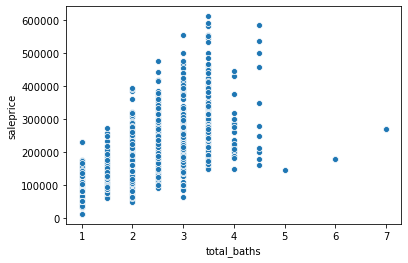

In [65]:
sns.scatterplot(x=train['total_baths'], y=train['saleprice']);

In [66]:
train.dtypes[train.dtypes==object]

ms_zoning       object
street          object
alley           object
land_contour    object
lot_config      object
neighborhood    object
condition_1     object
condition_2     object
bldg_type       object
house_style     object
roof_style      object
roof_matl       object
exterior_1st    object
exterior_2nd    object
mas_vnr_type    object
foundation      object
heating         object
central_air     object
garage_type     object
fence           object
misc_feature    object
sale_type       object
dtype: object

In [67]:
train['central_air'] = pd.get_dummies(train['central_air']) #dummying up central air since it is either yes or no

In [68]:
train['street'] = pd.get_dummies(train['street'])

In [69]:
train['lot_shape'].value_counts()

4    1295
3     692
2      55
1       9
Name: lot_shape, dtype: int64

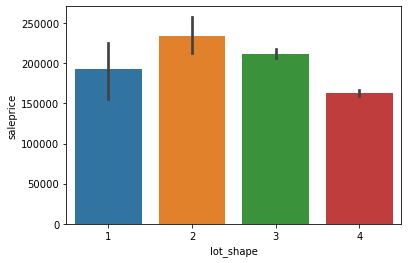

In [70]:
sns.barplot(x=train['lot_shape'], y=train['saleprice']);

Lot shape doesn't seem to have a significant impact on price so I won't be using this one.

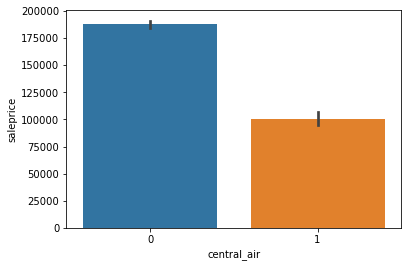

In [71]:
sns.barplot(x=train['central_air'], y=train['saleprice']);

In [72]:
train.columns

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt',
       'g

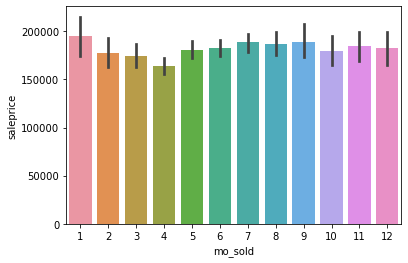

In [73]:
sns.barplot(x=train['mo_sold'], y=train['saleprice']);

In [74]:
#df = pd.concat([df, pd.get_dummies(df[['neighborhood']])], axis=1)

In [75]:
#based off code we did in class to plot the neighborhoods to see which ones are generally more expensive
price_means_neighborhood = train.groupby('neighborhood', as_index=False)['saleprice'].mean()
price_means_neighborhood

,neighborhood,saleprice
0,Blmngtn,200417.681818
1,Blueste,144566.666667
2,BrDale,103371.052632
3,BrkSide,127022.697368
4,ClearCr,217490.074074
5,CollgCr,202497.216667
6,Crawfor,205901.211268
7,Edwards,130493.468531
8,Gilbert,189228.387931
9,Greens,188666.666667


In [76]:
#based off of class to order the values from highest to lowest
order = price_means_neighborhood.sort_values('saleprice', ascending=False)['neighborhood'].values
order

array(['StoneBr', 'NridgHt', 'NoRidge', 'GrnHill', 'Veenker', 'Timber',
       'Somerst', 'ClearCr', 'Crawfor', 'CollgCr', 'Blmngtn', 'NWAmes',
       'Gilbert', 'Greens', 'SawyerW', 'Mitchel', 'NAmes', 'Blueste',
       'NPkVill', 'Sawyer', 'Landmrk', 'SWISU', 'Edwards', 'BrkSide',
       'OldTown', 'BrDale', 'IDOTRR', 'MeadowV'], dtype=object)

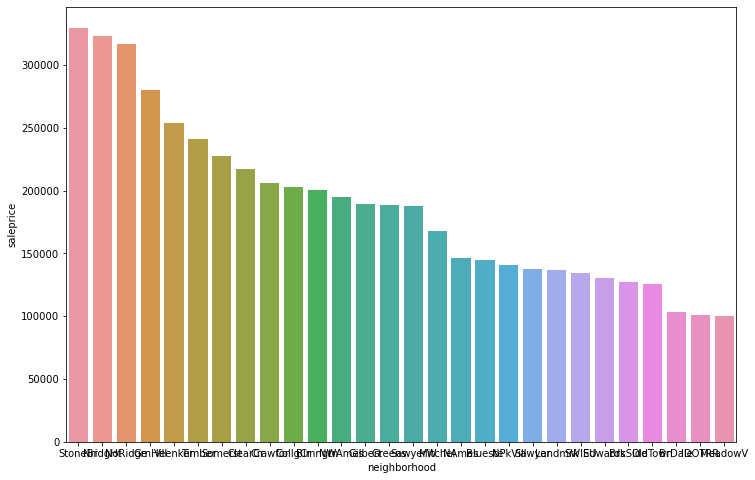

In [77]:
plt.figure(figsize=(12,8))

sns.barplot(x='neighborhood', y='saleprice', data=price_means_neighborhood, order=order);

In [78]:
train.dtypes[train.dtypes==object]

ms_zoning       object
alley           object
land_contour    object
lot_config      object
neighborhood    object
condition_1     object
condition_2     object
bldg_type       object
house_style     object
roof_style      object
roof_matl       object
exterior_1st    object
exterior_2nd    object
mas_vnr_type    object
foundation      object
heating         object
garage_type     object
fence           object
misc_feature    object
sale_type       object
dtype: object

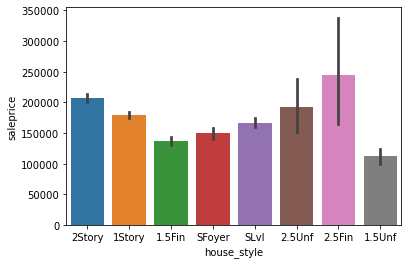

In [79]:
sns.barplot(x=train['house_style'], y=train['saleprice']);

In [108]:
train['alley'] = train['alley'].map({'Grvl':1, 'Pave':1, 0:0})

In [120]:
train.to_csv('./datasets/train_clean.csv')

## Cleaning testing data

In [81]:
test = pd.read_csv('./datasets/test.csv')

In [82]:
test.shape

(878, 80)

In [83]:
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [84]:
test.columns = test.columns.str.replace(' ', '_')
test.columns = test.columns.str.lower()

### Dealing with testing null values the same I did with training

In [85]:
test.isnull().sum()[test.isnull().sum()!=0]

lot_frontage      160
alley             820
mas_vnr_type        1
mas_vnr_area        1
bsmt_qual          25
bsmt_cond          25
bsmt_exposure      25
bsmtfin_type_1     25
bsmtfin_type_2     25
electrical          1
fireplace_qu      422
garage_type        44
garage_yr_blt      45
garage_finish      45
garage_qual        45
garage_cond        45
pool_qc           874
fence             706
misc_feature      837
dtype: int64

In [86]:
cols = ['mas_vnr_type', 'mas_vnr_area', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 
        'fireplace_qu', 'garage_type', 'garage_qual', 'garage_cond', 'garage_finish', 
        'garage_yr_blt', 'pool_qc', 'alley', 'fence', 'misc_feature'] 

for col in cols:
    test[col].fillna(0, inplace=True)

In [87]:
test.isnull().sum()[test.isnull().sum()!=0]

lot_frontage      160
bsmtfin_type_1     25
bsmtfin_type_2     25
electrical          1
dtype: int64

In [88]:
test['lot_frontage'].fillna(test['lot_frontage'].mean(), inplace=True)

In [89]:
for col in ['bsmtfin_type_1', 'bsmtfin_type_2']:
    test[col] = test[col].map(num_finish)

In [90]:
test['electrical'] = test['electrical'].map(elec_type)

In [91]:
test.isnull().sum()[test.isnull().sum() !=0]

Series([], dtype: int64)

### Converting ordinal data to numerical

In [92]:
for col in ['exter_qual', 'exter_cond', 'bsmt_qual', 'bsmt_cond', 'kitchen_qual', 
            'fireplace_qu', 'garage_qual', 'garage_cond', 'heating_qc', 'pool_qc']:
    test[col] = test[col].map(qual_to_num)

In [93]:
test['functional'] = test['functional'].map(house_func)

In [94]:
test['utilities'] = test['utilities'].map(utilities_type)

In [95]:
test['bsmt_exposure'] = test['bsmt_exposure'].map(base_expose)



In [96]:
test['garage_finish'] = test['garage_finish'].map(garage_fin_num)

In [97]:
test['paved_drive'] = test['paved_drive'].map(paved_drive)

In [98]:
test['central_air'] = pd.get_dummies(test['central_air'])

In [99]:
test['street'] = pd.get_dummies(test['street'])

In [100]:
test['lot_shape'] = test['lot_shape'].map(lot_shape)

In [101]:
test['land_slope'] = test['land_slope'].map(slope_type)

In [105]:
test['alley'] = test['alley'].map({'Grvl':1, 'Pave':1, 0:0})

In [113]:
test['fence'] = test['fence'].map(fence_num)

In [117]:
test['total_baths'] = test['bsmt_full_bath'] + (test['bsmt_half_bath'] * 0.5) + test['full_bath'] + (test['half_bath'] * 0.5)




In [118]:
test.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,total_baths
0,2658,902301120,190,RM,69.000000,9142,0,1,4,Lvl,...,0,0,0,0,0,0,4,2006,WD,2.0
1,2718,905108090,90,RL,69.545961,9662,0,0,3,Lvl,...,0,0,0,0,0,0,8,2006,WD,2.0
2,2414,528218130,60,RL,58.000000,17104,0,0,3,Lvl,...,0,0,0,0,0,0,9,2006,New,3.5
3,1989,902207150,30,RM,60.000000,8520,0,0,4,Lvl,...,0,0,0,0,0,0,7,2007,WD,1.0
4,625,535105100,20,RL,69.545961,9500,0,0,3,Lvl,...,185,0,0,0,0,0,7,2009,WD,2.5


In [119]:
test.to_csv('./datasets/test_clean.csv')